In [1]:
from skimage import data

image = data.camera()

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

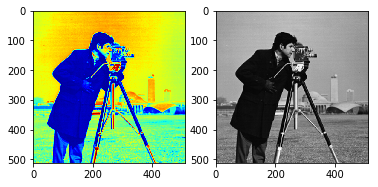

In [3]:
fix, (ax_jet, ax_gray) = plt.subplots(ncols=2)
ax_jet.imshow(image, cmap='jet')
ax_gray.imshow(image, cmap='gray')

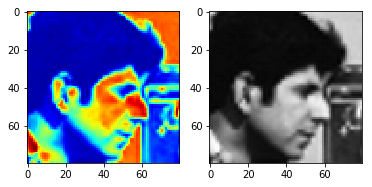

In [4]:
face = image[80:160, 200:280]
fix, (ax_jet, ax_gray) = plt.subplots(ncols=2)
ax_jet.imshow(face, cmap='jet')
ax_gray.imshow(face, cmap='gray')

In [5]:
plt.rcParams['image.cmap'] = 'gray'

plt.rcParams['image.interpolation'] = 'none'

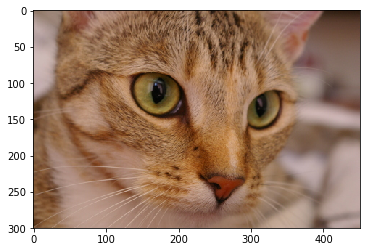

In [6]:
color_image = data.chelsea()
plt.imshow(color_image)


In [7]:
color_image.shape

(300, 451, 3)

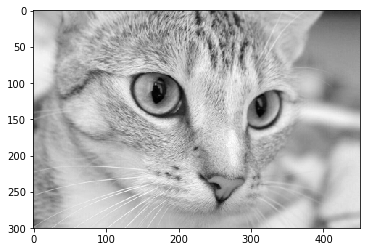

In [8]:
red_channel = color_image[:, :, 0]
plt.imshow(red_channel)

In [9]:
red_channel.shape

(300, 451)

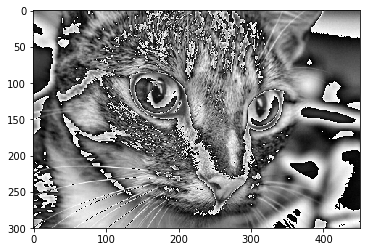

In [10]:
red, green, blue = color_image[:, :, 0], color_image[:, :, 1], color_image[:, :, 2]
plt.imshow(red + green + blue)

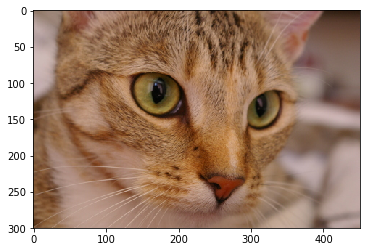

In [11]:
plt.imshow(np.dstack([red, green, blue]))

(array([  8248.,  17821.,  36505.,  56627.,  75126.,  81735.,  68784.,
         46507.,  14455.,     92.]),
 array([   0. ,   23.1,   46.2,   69.3,   92.4,  115.5,  138.6,  161.7,
         184.8,  207.9,  231. ]),
 <a list of 10 Patch objects>)

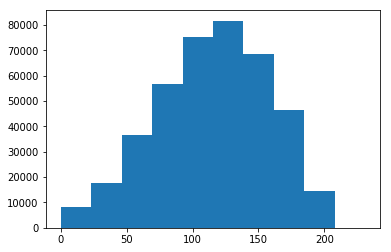

In [12]:
plt.hist(color_image.flatten())

In [13]:
from skimage import exposure

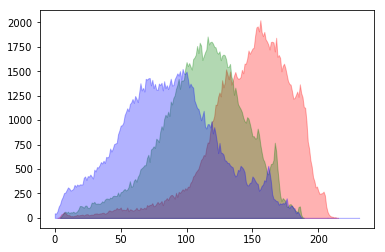

In [14]:
for color, channel in zip('rgb', np.rollaxis(color_image, axis=-1)):
    counts, bin_centers = exposure.histogram(channel)
    plt.fill_between(bin_centers, counts, color=color, alpha=0.3)

In [16]:
print(image.dtype)

uint8


In [17]:
np.iinfo(image.dtype)

iinfo(min=0, max=255, dtype=uint8)

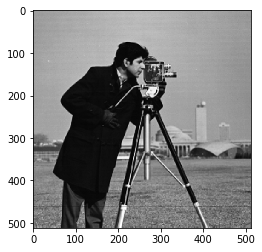

In [18]:
plt.imshow(image)
counts, bins = exposure.histogram(image)

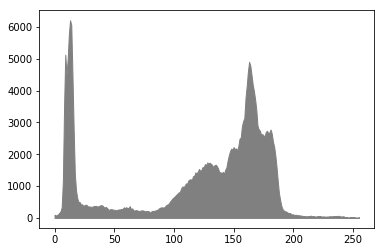

In [20]:
plt.fill_between(bins, counts, color='grey')

In [21]:
from skimage import exposure

high_contrast = exposure.rescale_intensity(image, in_range=(10, 180))

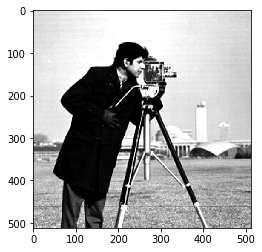

In [22]:
plt.imshow(high_contrast)
bins, counts = exposure.histogram(high_contrast)

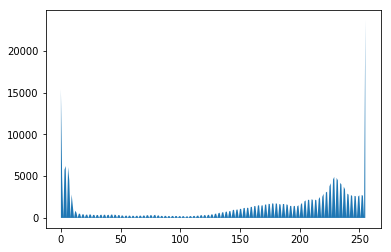

In [23]:
plt.fill_between(counts, bins)

In [24]:
import skimage
from skimage import exposure

equalized = exposure.equalize_hist(color_image)

/home/cass/.pyenv/versions/3.6.2/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


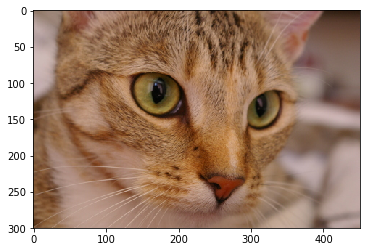

In [25]:
plt.imshow(color_image)

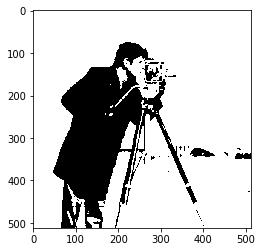

In [26]:
threshold = 50
plt.imshow(image > threshold)

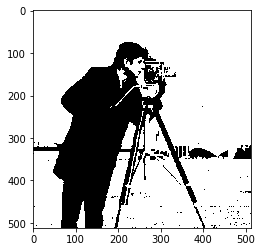

In [27]:
from skimage import filters
threshold = filters.threshold_otsu(image)

plt.imshow(image > threshold)